<a href="https://colab.research.google.com/github/TamimurRahman/-Machine-Learning-Project/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [28]:
data_train_path = "/content/drive/MyDrive/Fall 2024/ML lab/Machine Learning Project/Fruits_Vegetables/Fruits_Vegetables/train"
data_test_path = "/content/drive/MyDrive/Fall 2024/ML lab/Machine Learning Project/Fruits_Vegetables/Fruits_Vegetables/test"
data_val_path = '/content/drive/MyDrive/Fall 2024/ML lab/Machine Learning Project/Fruits_Vegetables/Fruits_Vegetables/validation'
# Image dimensions
img_width = 180
img_height = 180



In [29]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split= False
)

Found 3123 files belonging to 36 classes.


In [30]:
data_cat=data_train.class_names

In [31]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split= False
)

Found 351 files belonging to 36 classes.


In [32]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


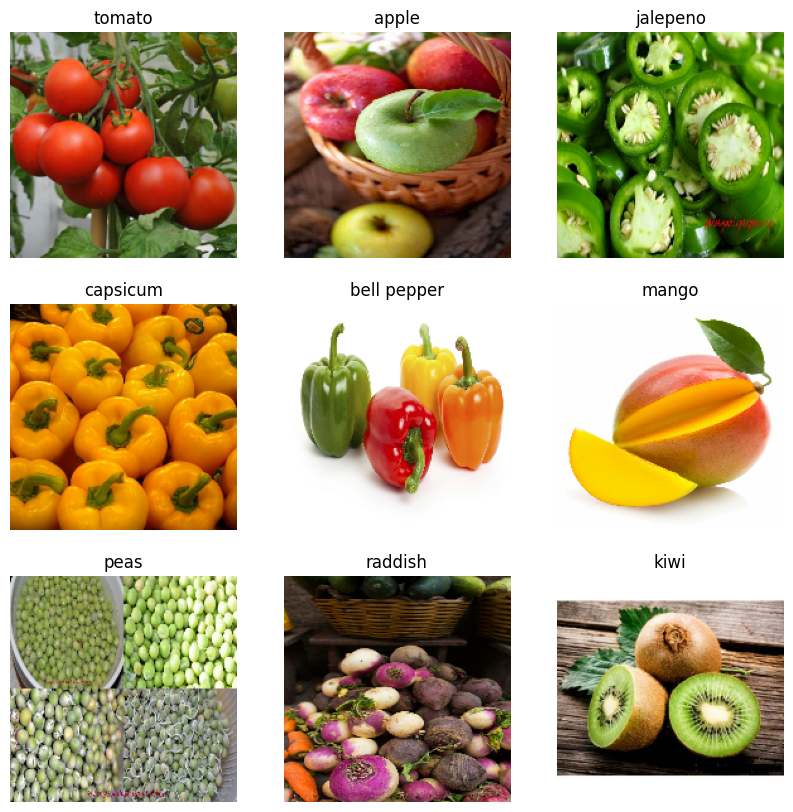

In [33]:
plt.figure(figsize = (10,10))
for image,labels in data_train.take(1):
   for i in range(9):
     plt.subplot(3,3,i+1)
     plt.imshow(image[i].numpy().astype('uint8'))
     plt.title(data_cat[labels[i]])
     plt.axis('off')



In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [35]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),  # Normalize pixel values
    layers.Conv2D(16, 3, padding='same', activation='relu'),          # First convolutional layer
    layers.MaxPooling2D(),                                           # First pooling layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),         # Second convolutional layer
    layers.MaxPooling2D(),                                           # Second pooling layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),         # Third convolutional layer
    layers.MaxPooling2D(),                                           # Third pooling layer
    layers.Flatten(),                                                # Flatten layer
    layers.Dropout(0.2),                                             # Dropout layer
    layers.Dense(128, activation='relu'),                            # Fully connected layer
    layers.Dense(units=len(data_cat))       # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']  # Fixed the typo: 'matrics' → 'metrics'
)


In [43]:
# Ensure you define `data_val` (validation dataset) before using it
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 495s 5s/step - accuracy: 0.0241 - loss: 12.7552 - val_accuracy: 0.0370 - val_loss: 12.9150
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.0324 - loss: 10.0439 - val_accuracy: 0.0256 - val_loss: 3.5835
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.0278 - loss: 3.5835 - val_accuracy: 0.0256 - val_loss: 3.5835
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.0276 - loss: 3.5835 - val_accuracy: 0.0256 - val_loss: 3.5835
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.0287 - loss: 3.5835 - val_accuracy: 0.0256 - val_loss: 3.5835
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.0306 - loss: 3.5835 - val_accuracy: 0.0256 - val_loss: 3.5835
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.0310 - loss: 3.5835 - val_accuracy: 0.0256 - val_loss: 3.5835
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.0277 - loss: 3.5835 - val_accuracy: 0.0256 

Text(0.5, 1.0, 'Loss')

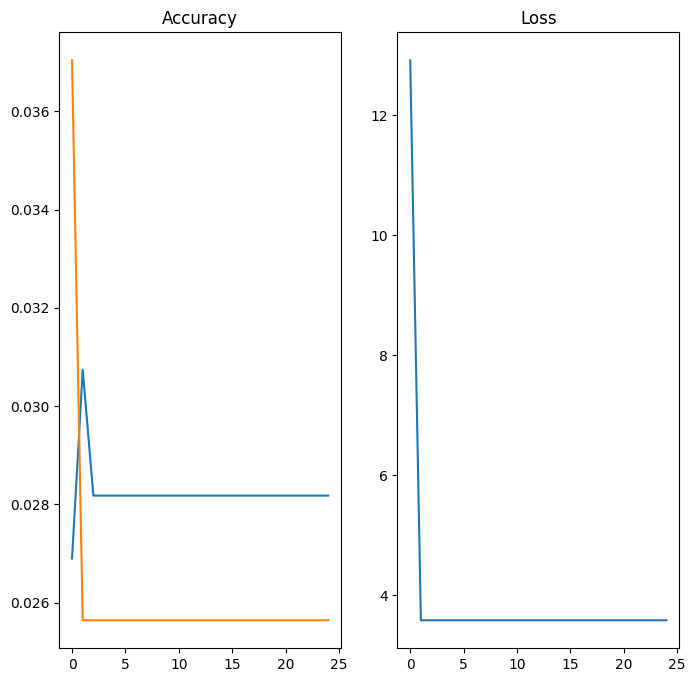

In [45]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [62]:
image = '/content/corn.jpg'
image = tf.keras.utils.load_img(image,target_size = (img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [63]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [66]:
score = tf.nn.softmax(predict)


In [65]:
print('Veg/Fruit is {} with accuracy of {:.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Veg/Fruit is jalepeno with accuracy of 3.74
